Step 1: Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

Step 2: Load the Dataset

In [21]:
data = pd.read_csv('/content/output (1).csv')
data

,Make,Model,Trim,Derivative,Derivative_Translated_English,Number_Of_Doors,Body_Type,Power_Train,Version_Name,Version_Name_Translated_English,...,Repair_Duration_Months,Repair_Distance_Km,Repair_Distance_Miles,Repair_Amount,Service,Service_Description,Service_Duration_Months,Service_Distance_Km,Service_Distance_Miles,Service_Amount
0,BMW,iX2,Not Available,BMW iX2 xDrive30 AHK M Sport M SportPro Innova...,BMW iX2 xDrive30 AHK M Sport M SportPro Innova...,4/5,SUV / Gelndewagen / Pickup,Elektro,BMWiX2BMW iX2 xDrive30 AHK M Sport M SportPro ...,BMWiX2BMW iX2 xDrive30 AHK M Sport M SportPro ...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,BMW,iX2,Not Available,BMW iX2 xDrive30 M Sportpaket Innovationspaket,BMW iX2 xDrive30 M Sportpaket Innovationspaket,4/5,SUV / Gelndewagen / Pickup,Elektro,BMWiX2BMW iX2 xDrive30 M Sportpaket Innovation...,BMWiX2BMW iX2 xDrive30 M Sportpaket Innovation...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,BMW,iX2,Not Available,BMW iX2 xDrive30 M Sportpaket Panorama Head Up...,BMW iX2 xDrive30 M Sportpaket Panorama Head Up...,4/5,SUV / Gelndewagen / Pickup,Elektro,BMWiX2BMW iX2 xDrive30 M Sportpaket Panorama H...,BMWiX2BMW iX2 xDrive30 M Sportpaket Panorama H...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,BMW,iX2,Not Available,BMW iX2 xDrive30 AHK M Sportpaket Innovationsp...,BMW iX2 xDrive30 AHK M Sportpaket Innovationsp...,4/5,SUV / Gelndewagen / Pickup,Elektro,BMWiX2BMW iX2 xDrive30 AHK M Sportpaket Innova...,BMWiX2BMW iX2 xDrive30 AHK M Sportpaket Innova...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,Suzuki,Vitara,Not Available,Suzuki Vitara SHINKAI 1.5 HYBRID ALLGRIP AGS C...,Suzuki Vitara SHINKAI 1.5 HYBRID ALLGRIP AGS C...,4/5,SUV / Gelndewagen / Pickup,Benzin,SuzukiVitaraSuzuki Vitara SHINKAI 1.5 HYBRID A...,SuzukiVitaraSuzuki Vitara SHINKAI 1.5 HYBRID A...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Seat,Arona,Not Available,"Seat Arona FR PRO 1.0TSI KESSY,LED,PDC,SZH,VIR...","Seat Arona FR PRO 1.0TSI KESSY,LED,PDC,SZH,VIR...",4/5,SUV / Gelndewagen / Pickup,Benzin,"SeatAronaSeat Arona FR PRO 1.0TSI KESSY,LED,PD...","SeatAronaSeat Arona FR PRO 1.0TSI KESSY,LED,PD...",...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
811,Cupra,Leon,Not Available,"Cupra Leon Sportstourer 2.0 TDI DSG NAVI,ACC,F...","Cupra Leon Sportstourer 2.0 TDI DSG NAVI,ACC,F...",4/5,Kombi,Diesel,CupraLeonCupra Leon Sportstourer 2.0 TDI DSG N...,CupraLeonCupra Leon Sportstourer 2.0 TDI DSG N...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
812,Cupra,Leon,Not Available,"Cupra Leon Sportstourer 2.0 TDI DSG NAVI,ACC,F...","Cupra Leon Sportstourer 2.0 TDI DSG NAVI,ACC,F...",4/5,Kombi,Diesel,CupraLeonCupra Leon Sportstourer 2.0 TDI DSG N...,CupraLeonCupra Leon Sportstourer 2.0 TDI DSG N...,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
813,Cupra,Formentor,Not Available,"Cupra Formentor 1.5 eTSI DSG NAVI,SENNHEISER,A...","Cupra Formentor 1.5 eTSI DSG NAVI,SENNHEISER,A...",4/5,SUV / Gelndewagen / Pickup,Benzin,CupraFormentorCupra Formentor 1.5 eTSI DSG NAV...,CupraFormentorCupra Formentor 1.5 eTSI DSG NAV...,...,Not Available,Not Available,Not Available,Not Available,No

Step 3: Extract Features and Target Variable

In [7]:
X = data[['Price', 'Contract_Duration_Months', 'Yearly_Mileage_Km']]
y = data['Regular_Monthly_Instalment_Amount_Retail']

In [33]:
X

,Price,Contract_Duration_Months,Yearly_Mileage_Km
0,61.980,48,4999.986026
1,58.150,48,4999.986026
2,61.450,48,4999.986026
3,57.980,48,4999.986026
4,24.985,60,9999.972051
...,...,...,...
810,24.390,48,9999.972051
811,38.350,24,9999.972051
812,38.350,24,9999.972051
813,40.990,48,9999.972051


In [34]:
y

,Regular_Monthly_Instalment_Amount_Retail
0,760.61
1,714.98
2,754.77
3,702.38
4,221.00
...,...
810,219.00
811,329.00
812,329.00
813,399.00


Step 4: Split the Dataset into Training and Testing Sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Initialize and Train Multiple Models

In [22]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Train models and store predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


Step 6: Evaluate and Compare Model Performance

In [23]:
# Evaluate and compare model performance
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")

Random Forest - MSE: 8454.0343, R^2: 0.8659
Gradient Boosting - MSE: 9867.8166, R^2: 0.8435
Linear Regression - MSE: 14853.0296, R^2: 0.7644


Step 7: Visualization of Actual vs. Predicted Values for Each Model Separately

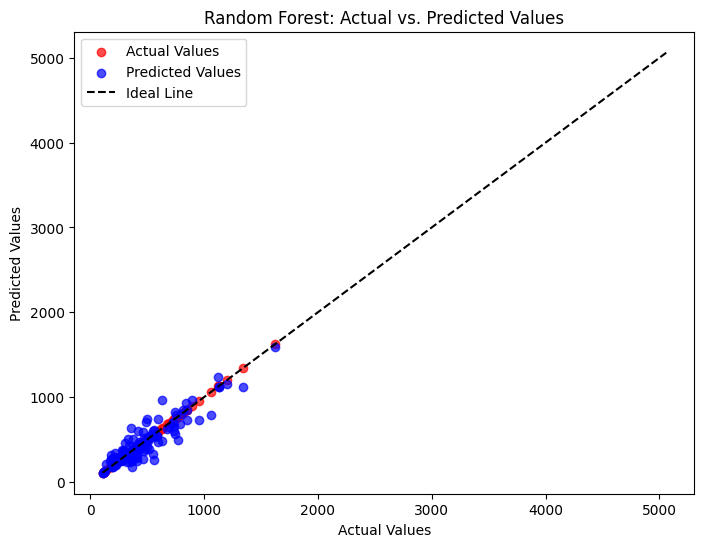

In [36]:
# Visualization: Actual vs. Predicted Values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.7, color='red', label='Actual Values')
plt.scatter(y_test, predictions['Random Forest'], alpha=0.7, color='blue', label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Line')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted Values')
plt.legend()
plt.show()

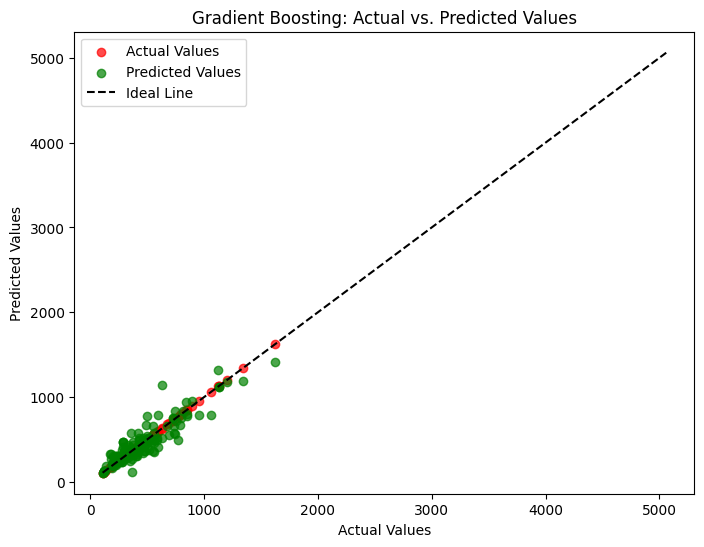

In [37]:
# Visualization: Actual vs. Predicted Values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.7, color='red', label='Actual Values')
plt.scatter(y_test, predictions['Gradient Boosting'], alpha=0.7, color='green', label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Line')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs. Predicted Values')
plt.legend()
plt.show()

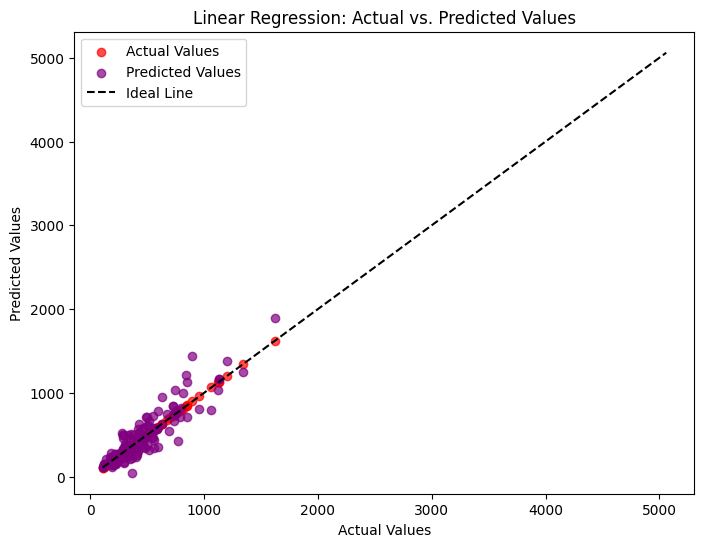

In [38]:
# Visualization: Actual vs. Predicted Values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.7, color='red', label='Actual Values')
plt.scatter(y_test, predictions['Linear Regression'], alpha=0.7, color='purple', label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Line')  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

Step 8: Define the Interactive Widget for Predictions (Using the Best Model)


In [39]:
best_model = models['Random Forest']

# Define the interactive widget for predictions
price_widget = widgets.FloatText(description='Price:')
contract_duration_widget = widgets.IntText(description='Contract Duration (Months):')
yearly_mileage_widget = widgets.FloatText(description='Yearly Mileage (Km):')
predict_button = widgets.Button(description='Predict')

output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        price = price_widget.value
        contract_duration = contract_duration_widget.value
        yearly_mileage = yearly_mileage_widget.value
        prediction = best_model.predict([[price, contract_duration, yearly_mileage]])
        print(f"Predicted Regular Monthly Instalment Amount Retail: ${prediction[0]:.2f}")

predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(price_widget, contract_duration_widget, yearly_mileage_widget, predict_button, output)

FloatText(value=0.0, description='Price:')

IntText(value=0, description='Contract Duration (Months):')

FloatText(value=0.0, description='Yearly Mileage (Km):')

Button(description='Predict', style=ButtonStyle())

Output()